In [235]:
%matplotlib notebook
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import cross_val_score
from sklearn import ensemble
import math

In [236]:
df = pd.read_csv("../Data Science/West Nile/train.csv")
weather = pd.read_csv("../Data Science/West Nile/weather.csv")
spray = pd.read_csv("../Data Science/West Nile/spray.csv")

In [237]:
df.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [238]:
df['Address'].head(5)

0    4100 North Oak Park Avenue, Chicago, IL 60634,...
1    4100 North Oak Park Avenue, Chicago, IL 60634,...
2    6200 North Mandell Avenue, Chicago, IL 60646, USA
3      7900 West Foster Avenue, Chicago, IL 60656, USA
4      7900 West Foster Avenue, Chicago, IL 60656, USA
Name: Address, dtype: object

In [239]:
def extract_st(address):
    sid = address.split(",")[0].strip().split(" ")[0].strip()
    return sid

In [240]:
def extract_postal(address):
    postal = address.split(",")[2].strip().split(" ")[1].strip()
    return postal

In [241]:
df['sid'] = df['Address'].apply(extract_st)
#df['postal'] = df['Address'].apply(extract_postal) 

In [242]:
df.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,sid
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,4100
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,4100
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,6200
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,7900
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,7900


In [243]:
df.drop("Address", axis=1, inplace=True)
df.drop("Street", axis=1, inplace=True)
df.drop("AddressNumberAndStreet", axis=1, inplace=True)
df.drop("Trap", axis=1, inplace=True)
df.drop("AddressAccuracy", axis=1, inplace=True)
df.drop("Longitude", axis=1, inplace=True)

In [244]:
df['Latitude'] = df['Latitude'].apply(int)

In [245]:
df.head(10)

,Date,Species,Block,Latitude,NumMosquitos,WnvPresent,sid
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,41,1,0,4100
1,2007-05-29,CULEX RESTUANS,41,41,1,0,4100
2,2007-05-29,CULEX RESTUANS,62,41,1,0,6200
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,41,1,0,7900
4,2007-05-29,CULEX RESTUANS,79,41,4,0,7900
5,2007-05-29,CULEX RESTUANS,15,41,2,0,1500
6,2007-05-29,CULEX RESTUANS,25,41,1,0,2500
7,2007-05-29,CULEX PIPIENS/RESTUANS,11,41,1,0,1100
8,2007-05-29,CULEX RESTUANS,11,41,2,0,1100
9,2007-05-29,CULEX RESTUANS,11,41,1,0,1100


In [246]:
def extract_month(date):
    date = str(date)
    return str(int(date.split("-")[1].strip()))

In [247]:
df['month'] = df['Date'].apply(extract_month)
#df.drop("Date", axis=1, inplace=True)
df.head(5)

,Date,Species,Block,Latitude,NumMosquitos,WnvPresent,sid,month
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,41,1,0,4100,5
1,2007-05-29,CULEX RESTUANS,41,41,1,0,4100,5
2,2007-05-29,CULEX RESTUANS,62,41,1,0,6200,5
3,2007-05-29,CULEX PIPIENS/RESTUANS,79,41,1,0,7900,5
4,2007-05-29,CULEX RESTUANS,79,41,4,0,7900,5


In [248]:
df.describe()

,Block,Latitude,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.038930,12.853512,0.052446
std,24.339468,0.193438,16.133816,0.222936
min,10.000000,41.000000,1.000000,0.000000
25%,12.000000,41.000000,2.000000,0.000000
50%,33.000000,41.000000,5.000000,0.000000
75%,52.000000,41.000000,17.000000,0.000000
max,98.000000,42.000000,50.000000,1.000000


In [249]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [250]:
describe_categorical(df)

,Date,Species,sid,month
count,10506,10506,10506,10506
unique,95,7,69,6
top,2007-08-01,CULEX PIPIENS/RESTUANS,South,8
freq,551,4752,1430,3751


In [251]:
df['month'] = df['month'].apply(int)
df['Species'] = pd.factorize(df['Species'])[0]
df['sid'] = pd.factorize(df['sid'])[0]

In [252]:
df.head(5)

,Date,Species,Block,Latitude,NumMosquitos,WnvPresent,sid,month
0,2007-05-29,0,41,41,1,0,0,5
1,2007-05-29,1,41,41,1,0,0,5
2,2007-05-29,1,62,41,1,0,1,5
3,2007-05-29,0,79,41,1,0,2,5
4,2007-05-29,1,79,41,4,0,2,5


# Weather

In [253]:
weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [254]:
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)
print(weather.head(5))

   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68     -1        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52     -1        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

     ...    CodeSum Depth Water1 SnowFall  PrecipTotal StnPressure SeaLevel  \
0    ...                0     -1      0.0         0.00       29.10    29.82   
1    ...               -1     -1       -1         0.00       29.18    29.82   
2    ...         BR     0     -1      0.0         0.00       29.38    30.09   
3    ...      BR HZ    -1     -1       -1         0.00       29.44    30.08   
4    ...                0     -1      0.0         0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7       

In [255]:
weather.drop("CodeSum", axis=1, inplace=True)

In [256]:
stasion1 = weather[weather['Station'] ==1]
stasion2 = weather[weather['Station'] ==2]
stasion1.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,1849,0,-1,0.0,0.00,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,1850,0,-1,0.0,0.00,29.38,30.09,13.0,4,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,1851,0,-1,0.0,0.00,29.39,30.12,11.7,7,11.9
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,1852,0,-1,0.0,-1,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,1853,0,-1,0.0,-1,29.40,30.10,11.7,7,12.0


In [257]:
stasion1.drop('Station', axis=1, inplace=True)
stasion2.drop('Station', axis=1, inplace=True)

c:\users\stardust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\stardust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [258]:
weather = stasion1.merge(stasion2, on="Date")
weather.head(10)

,Date,Tmax_x,Tmin_x,Tavg_x,Depart_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,Sunrise_x,...,Sunset_y,Depth_y,Water1_y,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2007-05-01,83,50,67,14,51,56,0,2,0448,...,-1,-1,-1,-1,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,0447,...,-1,-1,-1,-1,0.00,29.44,30.08,13.3,2,13.4
2,2007-05-03,66,46,56,2,40,48,9,0,0446,...,-1,-1,-1,-1,0.00,29.46,30.12,12.9,6,13.2
3,2007-05-04,66,49,58,4,41,50,7,0,0444,...,-1,-1,-1,-1,0.00,29.36,30.04,10.1,7,10.4
4,2007-05-05,66,53,60,5,38,49,5,0,0443,...,-1,-1,-1,-1,-1,29.46,30.09,11.2,7,11.5
5,2007-05-06,68,49,59,4,30,46,6,0,0442,...,-1,-1,-1,-1,0.00,29.62,30.28,13.8,10,14.5
6,2007-05-07,83,47,65,10,41,54,0,0,0441,...,-1,-1,-1,-1,0.00,29.44,30.12,8.5,17,9.9
7,2007-05-08,82,54,68,12,58,62,0,3,0439,...,-1,-1,-1,-1,-1,29.36,30.02,2.5,8,5.4
8,2007-05-09,77,61,69,13,59,63,0,4,0438,...,-1,-1,-1,-1,0.02,29.28,29.93,3.9,7,5.9
9,2007-05-10,84,56,70,14,52,60,0,5,0437,...,-1,-1,-1,-1,0.00,29.26,29.91,2.0,9,3.9


In [259]:
weather['Tavg_x'] = weather['Tavg_x'].apply(int)
weather['Tavg_y'] = weather['Tavg_y'].apply(int)
weather['temp'] = (weather['Tavg_x'] + weather['Tavg_y']) / 2
weather[['Tavg_x', 'Tavg_y', 'temp']].head(5)

,Tavg_x,Tavg_y,temp
0,67,68,67.5
1,51,52,51.5
2,56,58,57.0
3,58,-1,28.5
4,60,60,60.0


In [260]:
weather['AvgSpeed_x'] = weather['AvgSpeed_x'].apply(float)
weather['AvgSpeed_y'] = weather['AvgSpeed_y'].apply(float)
weather['speed'] = (weather['AvgSpeed_x'] + weather['AvgSpeed_y']) / 2
weather[['AvgSpeed_x', 'AvgSpeed_y', 'speed']].head(5)

,AvgSpeed_x,AvgSpeed_y,speed
0,9.2,9.6,9.40
1,13.4,13.4,13.40
2,11.9,13.2,12.55
3,10.8,10.4,10.60
4,12.0,11.5,11.75


In [261]:
weather['SeaLevel_x'] = weather['SeaLevel_x'].apply(float)
weather['SeaLevel_y'] = weather['SeaLevel_y'].apply(float)
weather['sea_level'] = (weather['SeaLevel_x'] + weather['SeaLevel_y']) / 2
weather[['SeaLevel_x', 'SeaLevel_y', 'sea_level']].head(5)

,SeaLevel_x,SeaLevel_y,sea_level
0,29.82,29.82,29.820
1,30.09,30.08,30.085
2,30.12,30.12,30.120
3,30.05,30.04,30.045
4,30.10,30.09,30.095


In [262]:
weather['Heat_x'] = weather['Heat_x'].apply(int)
weather['Heat_y'] = weather['Heat_y'].apply(int)
weather['heat'] = (weather['Heat_x'] + weather['Heat_y']) / 2
weather[['Heat_x', 'Heat_y', 'heat']].head(5)
weather['Cool_x'] = weather['Cool_x'].apply(int)
weather['Cool_y'] = weather['Cool_y'].apply(int)
weather['cool'] = (weather['Cool_x'] + weather['Cool_y']) / 2
weather[['Cool_x', 'Cool_y', 'cool']].head(5)

,Cool_x,Cool_y,cool
0,2,3,2.5
1,0,0,0.0
2,0,0,0.0
3,0,-1,-0.5
4,0,0,0.0


In [263]:
target_weather = weather[['Date', 'temp', 'speed', 'sea_level', 'heat', 'cool']]
target_weather.head(5)

,Date,temp,speed,sea_level,heat,cool
0,2007-05-01,67.5,9.40,29.820,0.0,2.5
1,2007-05-02,51.5,13.40,30.085,13.5,0.0
2,2007-05-03,57.0,12.55,30.120,8.0,0.0
3,2007-05-04,28.5,10.60,30.045,3.0,-0.5
4,2007-05-05,60.0,11.75,30.095,5.0,0.0


In [264]:
weather = target_weather
weather.describe()

,temp,speed,sea_level,heat,cool
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,66.985054,8.570686,29.873458,3.390625,5.622283
std,10.932994,3.116384,1.215915,5.913143,6.056077
min,24.000000,2.000000,14.395000,-0.500000,-0.500000
25%,60.000000,6.300000,29.870000,0.000000,0.000000
50%,69.000000,8.050000,29.970000,0.000000,4.000000
75%,75.500000,10.362500,30.060000,4.500000,10.500000
max,93.500000,23.850000,30.525000,29.000000,28.500000


In [265]:
df = df.merge(weather, on="Date")
df.drop("Date", axis=1, inplace=True)
df.head(10)

,Species,Block,Latitude,NumMosquitos,WnvPresent,sid,month,temp,speed,sea_level,heat,cool
0,0,41,41,1,0,0,5,75.5,6.95,30.1,0.0,10.5
1,1,41,41,1,0,0,5,75.5,6.95,30.1,0.0,10.5
2,1,62,41,1,0,1,5,75.5,6.95,30.1,0.0,10.5
3,0,79,41,1,0,2,5,75.5,6.95,30.1,0.0,10.5
4,1,79,41,4,0,2,5,75.5,6.95,30.1,0.0,10.5
5,1,15,41,2,0,3,5,75.5,6.95,30.1,0.0,10.5
6,1,25,41,1,0,4,5,75.5,6.95,30.1,0.0,10.5
7,0,11,41,1,0,5,5,75.5,6.95,30.1,0.0,10.5
8,1,11,41,2,0,5,5,75.5,6.95,30.1,0.0,10.5
9,1,11,41,1,0,5,5,75.5,6.95,30.1,0.0,10.5


In [266]:
df = df.convert_objects(convert_numeric=True)

c:\users\stardust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [267]:
test = df.tail(1000)
test.head(5)

,Species,Block,Latitude,NumMosquitos,WnvPresent,sid,month,temp,speed,sea_level,heat,cool
9506,2,40,41,36,0,25,8,73.0,10.05,29.97,0.0,8.0
9507,0,91,41,20,0,13,8,73.0,10.05,29.97,0.0,8.0
9508,0,91,41,50,0,13,8,73.0,10.05,29.97,0.0,8.0
9509,2,91,41,38,1,13,8,73.0,10.05,29.97,0.0,8.0
9510,0,10,41,11,0,61,8,73.0,10.05,29.97,0.0,8.0


In [268]:
df = df[:-1000]
df.describe()

,Species,Block,Latitude,NumMosquitos,WnvPresent,sid,month,temp,speed,sea_level,heat,cool
count,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000
mean,0.884073,35.461182,41.038923,12.749106,0.040080,29.096255,7.609089,73.120766,7.518678,29.953501,0.969756,9.090522
std,0.967339,24.277950,0.193421,16.367211,0.196157,18.692469,1.077208,7.698541,2.526173,0.117887,2.821231,5.803030
min,0.000000,10.000000,41.000000,1.000000,0.000000,0.000000,5.000000,51.000000,2.400000,29.595000,0.000000,0.000000
25%,0.000000,12.000000,41.000000,2.000000,0.000000,16.000000,7.000000,70.000000,5.800000,29.880000,0.000000,5.000000
50%,1.000000,33.000000,41.000000,4.000000,0.000000,24.000000,8.000000,75.000000,7.000000,29.950000,0.000000,10.000000
75%,2.000000,52.000000,41.000000,17.000000,0.000000,44.000000,8.000000,79.000000,9.150000,30.040000,0.000000,14.000000
max,5.000000,98.000000,42.000000,50.000000,1.000000,68.000000,10.000000,85.500000,15.650000,30.330000,14.000000,20.500000


# XGBoost

In [269]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors], label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    print(cvresult)
    return alg

In [270]:
predictors = [x for x in df.columns if x not in ['WnvPresent']]
predictors

['Species',
 'Block',
 'Latitude',
 'NumMosquitos',
 'sid',
 'month',
 'temp',
 'speed',
 'sea_level',
 'heat',
 'cool']


Model Report
Accuracy : 0.9621
AUC Score (Train): 0.929324


<IPython.core.display.Javascript object>


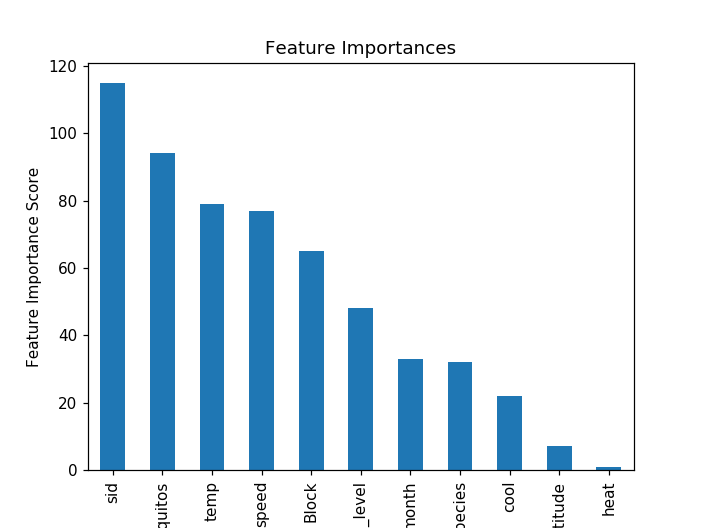

    test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0        0.787032      0.040254        0.800415       0.026313
1        0.806125      0.036726        0.821935       0.007731
2        0.820807      0.023264        0.832374       0.013819
3        0.828207      0.024239        0.856517       0.013332
4        0.841398      0.022853        0.869154       0.007259
5        0.845564      0.012650        0.879717       0.006256
6        0.848663      0.013313        0.884652       0.005994
7        0.850418      0.018046        0.887598       0.004855
8        0.849888      0.019520        0.889961       0.003806
9        0.852586      0.019691        0.894355       0.002914
10       0.854476      0.018727        0.898021       0.002997
11       0.854468      0.017483        0.902269       0.002211
12       0.856842      0.016460        0.903920       0.002533
13       0.857214      0.014048        0.907893       0.001110
14       0.857855      0.013053        0.909824       0

In [271]:
xgb1 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
clf = modelfit(xgb1, df, predictors, 'WnvPresent')

In [272]:
res = test['WnvPresent']
test.drop("WnvPresent", axis=1, inplace=True)

In [273]:
test.head(10)

,Species,Block,Latitude,NumMosquitos,sid,month,temp,speed,sea_level,heat,cool
9506,2,40,41,36,25,8,73.0,10.05,29.97,0.0,8.0
9507,0,91,41,20,13,8,73.0,10.05,29.97,0.0,8.0
9508,0,91,41,50,13,8,73.0,10.05,29.97,0.0,8.0
9509,2,91,41,38,13,8,73.0,10.05,29.97,0.0,8.0
9510,0,10,41,11,61,8,73.0,10.05,29.97,0.0,8.0
9511,0,10,41,34,61,8,73.0,10.05,29.97,0.0,8.0
9512,0,10,41,24,61,8,73.0,10.05,29.97,0.0,8.0
9513,0,10,41,6,61,8,73.0,10.05,29.97,0.0,8.0
9514,0,10,41,35,61,8,73.0,10.05,29.97,0.0,8.0
9515,1,10,41,4,61,8,73.0,10.05,29.97,0.0,8.0


In [274]:
ypred = clf.predict(test)
ypred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [275]:
res = res.as_matrix()

In [276]:
res

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1,

In [277]:
total = 0
co = 0
for i in ypred:
    total += math.pow((ypred[co] - res[co]), 2.0)
    co += 1
1 - (total / 1000.0)

0.831

In [280]:
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000)
clf.fit(df[predictors], df['WnvPresent'])
# create predictions and submission file
predictions = clf.predict(test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [279]:
total = 0
co = 0
for i in predictions:
    total += math.pow((predictions[co] - res[co]), 2.0)
    co += 1
1 - (total / 1000.0)

0.8565178144211222